# Sklearn機械学習入門

## 1. 基本事項

必要なパッケージをインポートする。

In [1]:
# import pandas, sklearn, matplotlib

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## 2. データの準備

### 2.1 CSVファイルからの読み込み

In [2]:
# CSVファイルの入力

curr = pd.read_csv("currency.csv")
curr.head()  # 先頭5件を出力

,Month,USD,EUR
0,2015-01,119.67,144.90
1,2015-02,117.45,132.65
2,2015-03,119.55,134.37
3,2015-04,120.10,128.53
4,2015-05,119.37,134.83


### 2.2 データの形式変換

In [3]:
# インデックスを属性に変換

curr["x"] = curr.index
curr.head()  # 先頭5件を出力

,Month,USD,EUR,x
0,2015-01,119.67,144.90,0
1,2015-02,117.45,132.65,1
2,2015-03,119.55,134.37,2
3,2015-04,120.10,128.53,3
4,2015-05,119.37,134.83,4


### 2.3 データの統計値

In [4]:
# 統計値の表示

curr.describe()

,USD,EUR,x
count,30.000000,30.000000,30.000000
mean,114.683333,126.586667,14.500000
std,7.003264,8.258059,8.803408
min,101.620000,113.820000,0.000000
25%,110.885000,121.032500,7.250000
50%,115.675000,126.095000,14.500000
75%,120.250000,133.587500,21.750000
max,124.100000,144.900000,29.000000


## 3. モデルの定義

### 3.1 基本設定

In [5]:
# Sklearnの設定

from sklearn.linear_model import LinearRegression

### 3.2 線形回帰モデル

In [6]:
# 線形回帰モデルの定義

clf = LinearRegression()
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 4. 学習

予測式： y = ax + b<br />
ただし、x は経過月数、y は USD の為替レート

### 4.1 トレーニングデータの作成

In [7]:
# 最初の27か月分のデータを抽出

curr27 = curr.loc[0:27]

x1 = curr27.x.values.reshape(-1, 1)
y1 = curr27.USD.values.reshape(-1, 1)
y1[0:5]  # 先頭5件を出力

array([[ 119.67],
       [ 117.45],
       [ 119.55],
       [ 120.1 ],
       [ 119.37]])

### 4.2 トレーニングデータによる学習

In [8]:
# データを学習

clf.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# 学習結果

print(clf.coef_)
print(clf.intercept_)

[[-0.57767378]]
[ 122.74359606]


## 5. 学習結果の評価

### 5.1 あてはめ精度

In [10]:
# あてはめ精度を計算

clf.score(x1, y1)

0.4375432425679836

### 5.2 学習結果をグラフ表示

In [11]:
# トレーニングデータに対する予測値を計算

est1 = clf.predict(x1)

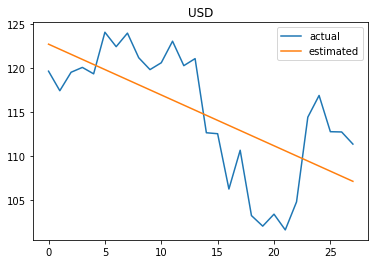

In [12]:
# 実測値と予測値の折れ線グラフを作成

plt.plot(x1, y1, label="actual")
plt.plot(x1, est1, label="estimated")
plt.title("USD")
plt.legend()
plt.show()

## 6. 予測

### 6.1 テストデータの作成

In [13]:
# 最近の3か月分のデータを抽出

curr3 = curr.loc[27:30]

x2 = curr3.x.values.reshape(-1, 1)
y2 = curr3.USD.values.reshape(-1, 1)
y2

array([[ 111.38],
       [ 111.29],
       [ 110.75]])

### 6.2 テストデータの予測

In [14]:
# テストデータに対する予測値を計算

est2 = clf.predict(x2)

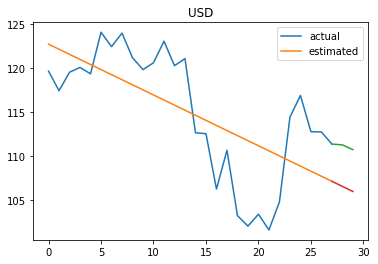

In [15]:
# 実測値と予測値の折れ線グラフを作成

# トレーニングデータ
plt.plot(x1, y1, label="actual")
plt.plot(x1, est1, label="estimated")

# テストデータ
plt.plot(x2, y2)
plt.plot(x2, est2)

plt.title("USD")
plt.legend()
plt.show()

In [16]:
# 予測誤差

est2-y2

array([[-4.23359606],
       [-4.72126984],
       [-4.75894362]])

## 7. 高次関数の適用

予測式： y = ax<sup>3</sup> + bx<sup>2</sup> + cx + d<br />
ただし、x は経過月数、y は USD の為替レート

### 7.1 データの準備

In [17]:
# 2次および3次の属性を作成

curr["x2"] = curr.x * curr.x
curr["x3"] = curr.x2 * curr.x
curr.head()  # 先頭5件を出力

,Month,USD,EUR,x,x2,x3
0,2015-01,119.67,144.90,0,0,0
1,2015-02,117.45,132.65,1,1,1
2,2015-03,119.55,134.37,2,4,8
3,2015-04,120.10,128.53,3,9,27
4,2015-05,119.37,134.83,4,16,64


### 7.2 学習

In [18]:
# 最初の27か月分のデータを抽出

curr27 = curr.loc[0:27]

X11 = curr27[["x", "x2", "x3"]]
y11 = curr27.USD.values.reshape(-1, 1)
X11[0:5]  # 先頭5件を出力

,x,x2,x3
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [19]:
# データを学習

clf.fit(X11, y11)
print(clf.coef_)
print(clf.intercept_)

[[ 3.18324088 -0.36936659  0.0093554 ]]
[ 115.64889083]


### 7.3 学習結果の評価

In [20]:
# あてはめ精度を計算

clf.score(X11, y11)

0.74103469720218196

In [21]:
# 学習データに対する予測値を計算

est11 = clf.predict(X11)
est11[0:5]  # 先頭5件を出力

array([[ 115.64889083],
       [ 118.47212052],
       [ 120.61274941],
       [ 122.12690988],
       [ 123.07073431]])

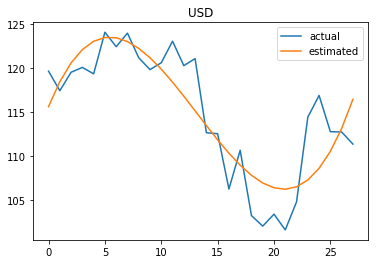

In [22]:
# 実測値と予測値の折れ線グラフを作成

x11 = X11.x
plt.plot(x11, y11, label="actual")
plt.plot(x11, est11, label="estimated")
plt.title("USD")
plt.legend()
plt.show()

### 7.4 予測

In [23]:
# 最近の3か月分のデータを抽出

curr3 = curr.loc[27:30]

X12 = curr3[["x", "x2", "x3"]]
y12 = curr3.USD.values.reshape(-1, 1)
X12[0:5]

,x,x2,x3
27,27,729,19683
28,28,784,21952
29,29,841,24389


In [24]:
# テストデータに対する予測値を計算

est12 = clf.predict(X12)

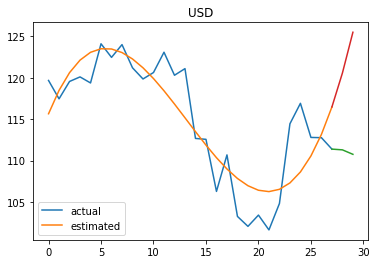

In [25]:
# 実測値と予測値の折れ線グラフを作成

x12 = X12.x
plt.plot(x11, y11, label="actual")
plt.plot(x11, est11, label="estimated")
plt.plot(x12, y12)
plt.plot(x12, est12)
plt.title("USD")
plt.legend()
plt.show()

In [26]:
# 予測誤差

est12-y12

array([[  5.09041951],
       [  9.27589255],
       [ 14.74433902]])